# Deep neural networks

Over the last 15 years, most major advances in AI have been achieved with the help of <I>deep</I> neural networks. This "AI revolution" started with deep neural networks outcompeting other approaches on computer vision tasks. However, over the years other feats have been added to this list, including beating the world champion in Go (something that was expected to still require decades of AI research), playing Atari games at expert human level, beating top players at StarCraft, predicting the 3d-structure of proteines, generating images based on textual inputs (DALL-E), and highly advanced chat bots (ChatGPT).

Deep neural networks had actually been around for quite a long time, but they were generally impractical to train. This changed due to three main advances:
<OL>
    <LI>Hardware: Graphical Processor Units (GPUs) considerably sped up deep neural network operations.</LI>
    <LI>More data: Digitalization led to larger data sets.</LI>
    <LI>Algorithmic: Better learning methods and model structures.</LI>
</OL>

Adding layers to a neural network increases its representational power, but also lead to additional problems, including:
<UL>
    <LI>Hyperparameters like the learning rate can be hard and costly to tune.</LI>
    <LI>The gradient used for learning can vanish or blow up over the layers.</LI>
    <LI>Network activations can also vanish or blow up over the layers.</LI>
    <LI>Trained networks may overfit and generalize badly to the test set.</LI>
</UL>

Here we will explore some of these learning problems and related solutions.

## Tuning the learning rate

As explained in the previous lecture, the core of neural network learning is still formed by gradient descent. 

<FONT COLOR="red"><B>Exercise 1.</B></FONT> <BR>
Below we create an artificial, quadratic loss function of a single parameter $x$. This parameter can be seen as the weight of a neural network. We perform straightforward gradient descent to minimize the loss function $\mathcal{L}(x) = a x^2 + bx + c$. In the plot, the initial iterations are represented by dark blue markers, the later ones by bright yellow.
<OL>
    <LI>Play around with the learning rate. What happens when you make it really small? What happens when you give it a value of $0.9$, $1.0$, $1.01$ or even much larger?</LI>
</OL>


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

fs = 15

# illustrate gradient descent, adam:
mx = 10
step = 0.01

# artificial loss function and its gradient:
a = 1
b = 0
c = 0
x = np.arange(-mx, mx, step)
loss_function = a * x ** 2 + b * x + c
gradient_loss_function = 2 * a * x + b

# gradient descent:
lr = 0.02
epsilon = 0.0001 # stop when close enough to the minimum
xi = mx / 2 # starting point
n_iterations = 100 # learning steps
xs = []
ys = []
iterations = []
for i in range(n_iterations):
    
    # store the current point and iteration:
    iterations.append(i)
    xs.append(xi)
    
    # perform a learning update:
    xi = xi - lr * (2 * a * xi + b)
    
    # store the loss
    ys.append(a * xi ** 2 + b * xi + c)
    
    if(ys[i] < np.min(loss_function) + epsilon):
        break
        
iterations = np.asarray(iterations)
xs  = np.asarray(xs)
ys = np.asarray(ys)

plt.figure()
plt.plot(x, loss_function, 'k')
plt.scatter(xs, a * xs ** 2 + b * xs + c, c = iterations, cmap='viridis')
plt.xlabel('$x$', fontsize=fs)
plt.ylabel('$\mathcal{L}(x)$', fontsize=fs)
plt.title('Gradient descent, learning rate = ' + str(lr), fontsize=fs)
plt.show()

## Momentum

As you have seen in the exercise, "vanilla" gradient descent backpropagation can take a long time when the gradient is small and can overshoot when the gradient is large. One traditional solution to this has been to introduce <i>momentum</i>: <BR>
    
$\mathbf{g}_t \leftarrow \rho \mathbf{g}_{t-1} + (1-\rho) \mathbf{\hat{g}}_t$

The effect of this will be especially positive when the gradient is changing sign a lot, as for a learning rate of $0.9$. 
    
<FONT COLOR="red"><B>Exercise 2.</B></FONT> <BR>
<OL>
    <LI>Implement momentum for the gradient in the code below. Also print the number of iterations that were necessary to converge to the optimum. Use a learning rate of $0.9$. <B>Can you set $\rho$ such that it decreases the number of necessary iterations?</B></LI>
</OL>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

fs = 15

# illustrate gradient descent, adam:
mx = 10
step = 0.01

# artificial loss function and its gradient:
a = 1
b = 0
c = 0
x = np.arange(-mx, mx, step)
loss_function = a * x ** 2 + b * x + c
gradient_loss_function = 2 * a * x + b

# gradient descent:
lr = 0.02
epsilon = 0.0001 # stop when close enough to the minimum
xi = mx / 2 # starting point
n_iterations = 100 # learning steps
xs = []
ys = []
iterations = []
for i in range(n_iterations):
    
    # store the current point and iteration:
    iterations.append(i)
    xs.append(xi)
    
    # perform a learning update:
    xi = xi - lr * (2 * a * xi + b)
    
    # store the loss
    ys.append(a * xi ** 2 + b * xi + c)
    
    if(ys[i] < np.min(loss_function) + epsilon):
        break
        
iterations = np.asarray(iterations)
xs  = np.asarray(xs)
ys = np.asarray(ys)

plt.figure()
plt.plot(x, loss_function, 'k')
plt.scatter(xs, a * xs ** 2 + b * xs + c, c = iterations, cmap='viridis')
plt.xlabel('$x$', fontsize=fs)
plt.ylabel('$\mathcal{L}(x)$', fontsize=fs)
plt.title('Gradient descent, learning rate = ' + str(lr), fontsize=fs)
plt.show()

## Adaptive moments (Adam)

Adam is an algorithm that introduces momentum to the gradient in an adaptive way. Specifically, it estimates a first and a second order moment as follows:  <BR>

$\mathbf{s} \leftarrow \rho_1 \mathbf{s} + (1-\rho_1) \mathbf{g}$
    
$\mathbf{r} \leftarrow \rho_2 \mathbf{r} + (1-\rho_2) \mathbf{g} \odot \mathbf{g}$

, where $\odot$ is the elementwise product. 
    
Then, the moments are corrected to remove the estimation bias:
    
$\mathbf{\hat{s}} \leftarrow \frac{\mathbf{s}}{1-\rho^t_1}$

$\mathbf{\hat{r}} \leftarrow \frac{\mathbf{r}}{1-\rho^t_2}$

, where $t$ corresponds to the number of past updates. 
    
The update of the parameters $\mathbf{\theta}$ then becomes:
    
$\mathbf{\Delta \theta} = - \alpha \frac{\mathbf{\hat{s}}}{\mathbf{\hat{r}} + \delta}$
    
, where $\delta$ is a small number that prevents dividing by zero. The first order momentum $\mathbf{s}$ is very similar to the momentum you implemented yourself in exercise 2. The role of the second order momentum $\mathbf{r}$ is to reduce step size in directions with large gradient magnitude, and increase them in directions with small gradient magnitude. This should lead to quicker convergence and less overshoot.<BR>
<BR>
    
    
<CENTER>
<IMG SRC="DALL·E 2023-01-16 09.01.15 - A robot version of the first man, Adam, taking an apple from a tree with a snake .png" WIDTH="400px"></IMG>
DALL-E's interpretation of the Adam algorithm.
</CENTER>    
    <BR>
        
<FONT COLOR="red"><B>Exercise 3.</B></FONT> <BR>
<OL>
    <LI>Implement Adam in the code block below. Does it lead to quicker convergence? What happens when you set a large learning rate like $1.01$?</LI>
</OL>


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

fs = 15

# illustrate gradient descent, adam:
mx = 10
step = 0.01

# artificial loss function and its gradient:
a = 1
b = 0
c = 0
x = np.arange(-mx, mx, step)
loss_function = a * x ** 2 + b * x + c
gradient_loss_function = 2 * a * x + b

# gradient descent:
lr = 0.02
epsilon = 0.0001 # stop when close enough to the minimum
xi = mx / 2 # starting point
n_iterations = 100 # learning steps
xs = []
ys = []
iterations = []
for i in range(n_iterations):
    
    # store the current point and iteration:
    iterations.append(i)
    xs.append(xi)
    
    # perform a learning update:
    xi = xi - lr * (2 * a * xi + b)
    
    # store the loss
    ys.append(a * xi ** 2 + b * xi + c)
    
    if(ys[i] < np.min(loss_function) + epsilon):
        break
        
iterations = np.asarray(iterations)
xs  = np.asarray(xs)
ys = np.asarray(ys)

plt.figure()
plt.plot(x, loss_function, 'k')
plt.scatter(xs, a * xs ** 2 + b * xs + c, c = iterations, cmap='viridis')
plt.xlabel('$x$', fontsize=fs)
plt.ylabel('$\mathcal{L}(x)$', fontsize=fs)
plt.title('Gradient descent, learning rate = ' + str(lr), fontsize=fs)
plt.show()

## Early stopping with a validation set

The goal of learning is not only to perform well on the data that is used for training, but to also perform well on data that has not yet been seen by the learning algorithm. If a neural network is able to also make good predictions for unseen data, then it is said to "generalize" well. As stated earlier, the deeper a neural network is, the more representative power it has. The advantage of this is that a deeper neural network can learn more complex functions. The disadvantage is that it can adjust itself to noise in the input data. This problem is aggravated when little data is available for training.

One way to prevent neural networks to overfit on the training data, is to divide the samples in a "training set" and a "validation set". The training set is used for adapting the weights with backpropagation, minimizing the error on the training samples. Each epoch the neural network is also applied to the validation set. When the network starts to overfit on the training data at the cost of generalization, the loss on the validation set will start to increase. The error on the validation set is not used for adapting the weights, but for determining when to stop training. 

Given a set of data samples, there is typically an additional "test set", which is not used during training at all. The loss on this test set can be reported to illustrate the true generalization performance. Of course, as soon as a Machine Learning practitioner uses the test set to adapt parameters of the learning algorithm, the test set has actually played a role in training. Then it looses its role as an independent test of the learned network.

<CENTER>
<IMG SRC="training_validation_test_split.png" WIDTH="400px"></IMG>
Illustration of a subdivision of a data set in a training, validation, and test set.
</CENTER>

<FONT COLOR="red"><B>Exercise 4.</B></FONT>

Below we coded a linear regression example, where we added normally distributed noise to the targets in the data set. We then split the data set in a training, validation and test set. In this case, we have purposively made the training set rather small, the validation set slightly bigger, and we have quite a large test set. Normally, one would do the opposite: Use a large part of the data for training and a much smaller part for validation and testing.

We use the ``torch.nn.Sequential`` method for creating a standard MLP. Also notice how the Adam optimizer is implemented here, simply by setting it as the optimizer: ``optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)``.

<OL>
    <LI>Implement a scheme that stops the training when the validation loss increases. <i>Hint:</i> You can low pass filter the validation loss to this end.</LI>
    <LI>What happens to the average training, validation, and test loss?</LI>
</OL>

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import random

# Whether to stop when the validation error increases:
stop_when_val_error_increases = False

# Create Tensors to hold input and outputs.
seed_number = 16012023
torch.manual_seed(seed_number)
np.random.seed(seed_number)
random.seed(seed_number)

# create the data:
limit = 3
n_steps = 1000
x = torch.linspace(-limit, limit, n_steps)
x = torch.reshape(x, (n_steps, 1))
y_no_noise = 0.2 * x
noise = 0.2 * torch.randn(x.shape)
y = y_no_noise + noise

# Split data into training, validation and test sets
n_training = 10
n_val = 30
inds = np.random.choice(n_steps, n_training, replace=False)
inds = np.sort(inds)
x_training = x[inds]
y_training = y[inds]
remaining_inds = np.setdiff1d(np.arange(n_steps), inds)
val_inds = np.random.choice(remaining_inds, n_val, replace=False)
val_inds = np.sort(val_inds)
x_val = x[val_inds]
y_val = y[val_inds]
remaining_inds = np.setdiff1d(remaining_inds, val_inds)
remaining_inds = np.sort(remaining_inds)
x_test = x[remaining_inds]
y_test = y[remaining_inds]
n_test = len(x_test)

# Make a neural network model for the MLP with sigmoid activation functions in the hidden layer, and linear on the output
n_hidden_neurons = 100
model = torch.nn.Sequential(torch.nn.Linear(1, n_hidden_neurons),
                            torch.nn.Sigmoid(),torch.nn.Linear(n_hidden_neurons, 1))

# We will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-2

# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_epochs = 1000
show_plots = False
show_plot_every = int(n_epochs / 5)

training_loss = np.zeros(n_epochs)
validation_loss = np.zeros(n_epochs)

for t in range(n_epochs):

    # Forward pass
    y_pred = model(x_training)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y_training)
    if t % 100 == 0:
        print(t, loss.item())

    training_loss[t] = loss.item()

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Determine validation loss
    y_val_pred = model(x_val)
    val_loss = loss_fn(y_val_pred, y_val)
    validation_loss[t] = val_loss.item()
    
    #if(stop_when_val_error_increases):
        
        # IMPLEMENT YOUR CODE HERE
        
        #print('Validation loss increased, stopping training')
        #break

    if show_plots and t % show_plot_every == 0:
        plt.figure()
        plt.plot(x, y_no_noise, 'k--')
        plt.plot(x_training, y_training, 'ko')
        plt.plot(x_training, y_pred.detach().numpy())
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend(['Ground truth', 'Data', 'Fit'])
        plt.show()

# Plot the final state of affairs:

mode_string = 'Validation set stopping' if stop_when_val_error_increases else 'No validation set'
y_pred = model(x_training)
y_pred_test = model(x_test)
test_loss = loss_fn(y_pred_test, y_test)
loss_string = "{:.2f}".format(test_loss.item())
title_string = mode_string + ', test loss: ' + loss_string
print('Test loss: ', test_loss.item())

plt.figure()
plt.plot(x, y_no_noise, 'k--')
plt.plot(x_training, y_training, 'ro')
plt.plot(x_val, y_val, 'go')
plt.plot(x_training, y_pred.detach().numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Ground truth', 'Training data', 'Validation data', 'Fit'])
plt.title(title_string)
plt.show()


# Plot the loss over time:
plt.figure()
plt.plot(training_loss, 'r')
plt.plot(validation_loss, 'g')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

print('Done')

# Plot the final state of affairs to compare SGD and Adam:
plt.figure()
plt.plot(x, y_no_noise, 'k--')
plt.plot(x_training, y_training, 'ko')
plt.plot(x_training, y_pred.detach().numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Ground truth', 'Data', 'Fit'])
plt.show()

y_pred = model(x_training)
loss = loss_fn(y_pred, y_training)
print(f'Average loss on the training set: {loss.item()/n_training:.2f}')

y_pred = model(x_val)
loss = loss_fn(y_pred, y_val)
print(f'Average loss on the validation set: {loss.item()/n_val:.2f}')

y_pred = model(x_test)
loss = loss_fn(y_pred, y_test)
print(f'Average loss on the test set: {loss.item()/n_test:.2f}')


## Ensemble learning
A well-proven method of increasing generalization and robustness is to use <i>ensembles</i> of neural networks. In ensemble learning, a group of neural networks is trained on different parts of the training set (see below for NN1-3). 

<IMG SRC="ensemble_training_set.png" WIDTH="200px"/>

Because the different networks train on different parts of the training data, they may give different outcomes for the same input sample, i.e., it can be that $\hat{y}_i \neq \hat{y}_j$, $i \neq j$ (see below). This allows for voting in classification problems or averaging in regression problems.

<IMG SRC="ensemble_prediction.png" WIDTH="200px"/>

Even though individual networks may overfit on their part of the training data, using an ensemble of networks will reduce the influence overfitting has on the final outcome. Having multiple outputs for the same input sample also allows for evaluating <i>uncertainty</i>, e.g., by looking at the variance of the individual network outputs.   

<CENTER>
    <IMG SRC="DALL·E 2023-03-06 11.21.22 - a group of robots voting.png" WIDTH="400px"/>
    An ensemble of robots voting by DALL-E.
</CENTER>

<FONT COLOR="red"><B>Exercise 5.</B></FONT>

<OL>
    <LI> Below we give the same code as before, in which a single network has a very small training set to which it will overfit. However, now we implemented the training of an ensemble of networks. Try out various numbers of `N_ensemble`. How many nets suffice to start approximating the ground truth function well?
    </LI>
</OL>

0 3.541048288345337
100 0.12627965211868286
200 0.10513316839933395
300 0.09505657851696014
400 0.08233129233121872
500 0.07173360139131546
600 0.06551852822303772
700 0.06231648847460747
800 0.05967706814408302
900 0.05727170780301094
0 2.359433174133301
100 0.15211670100688934
200 0.14883731305599213
300 0.1446698009967804
400 0.13638751208782196
500 0.1216386929154396
600 0.10875552892684937
700 0.09909628331661224
800 0.09009915590286255
900 0.08096310496330261
0 3.8361926078796387
100 0.3119787573814392
200 0.29634395241737366
300 0.2922168970108032
400 0.289629191160202
500 0.28728538751602173
600 0.28416767716407776
700 0.27745741605758667
800 0.2657302916049957
900 0.25528112053871155
0 1.8566555976867676
100 0.1670505255460739
200 0.12316252291202545
300 0.0985446646809578
400 0.08821739256381989
500 0.08244006335735321
600 0.07668189704418182
700 0.07290954142808914
800 0.06471554934978485
900 0.057352565228939056
0 2.236517906188965
100 0.2078983634710312
200 0.2050152868032

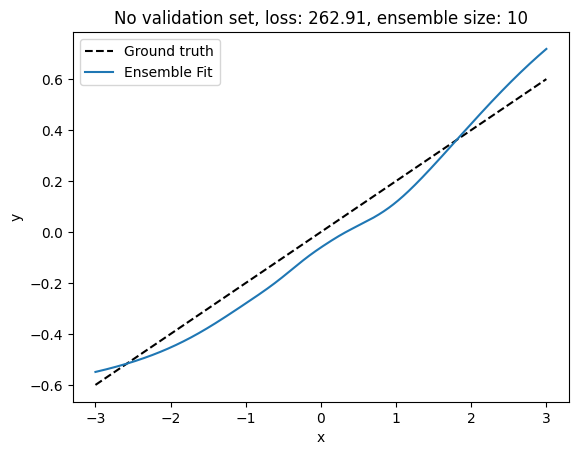

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import random

# Change the number of neural networks in the ensemble:
N_ensemble = 10

# Whether to stop when the validation error increases:
stop_when_val_error_increases = False

# Create Tensors to hold input and outputs.
seed_number = 16012023
#torch.random.seed = seed_number
torch.manual_seed(seed_number)
np.random.seed(seed_number)
random.seed(seed_number)

limit = 3
n_steps = 1000
x = torch.linspace(-limit, limit, n_steps)
x = torch.reshape(x, (n_steps, 1))
y_no_noise = 0.2 * x
noise = 0.2 * torch.randn(x.shape)
y = y_no_noise + noise

models = []

for i in range(N_ensemble):
    # Split data into training, validation and test sets
    n_training = 10
    n_val = 30
    inds = np.random.choice(n_steps, n_training, replace=False)
    inds = np.sort(inds)
    x_training = x[inds]
    y_training = y[inds]
    remaining_inds = np.setdiff1d(np.arange(n_steps), inds)
    val_inds = np.random.choice(remaining_inds, n_val, replace=False)
    val_inds = np.sort(val_inds)
    x_val = x[val_inds]
    y_val = y[val_inds]
    remaining_inds = np.setdiff1d(remaining_inds, val_inds)
    remaining_inds = np.sort(remaining_inds)
    x_test = x[remaining_inds]
    y_test = y[remaining_inds]

    # Make a neural network model for the MLP with sigmoid activation functions in the hidden layer, and linear on the output
    n_hidden_neurons = 100
    model = torch.nn.Sequential(torch.nn.Linear(1, n_hidden_neurons),
                                torch.nn.Sigmoid(),torch.nn.Linear(n_hidden_neurons, 1))

    # We will use Mean Squared Error (MSE) as our loss function.
    loss_fn = torch.nn.MSELoss(reduction='sum')

    learning_rate = 1e-2

    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    n_epochs = 1000
    show_plots = False
    show_plot_every = int(n_epochs / 5)
    training_loss = np.zeros(n_epochs)
    validation_loss = np.zeros(n_epochs)
    val_low_pass = 0

    for t in range(n_epochs):

        # Forward pass
        y_pred = model(x_training)

        # Compute and print loss. We pass Tensors containing the predicted and true
        # values of y, and the loss function returns a Tensor containing the
        # loss.
        loss = loss_fn(y_pred, y_training)
        if t % 100 == 0:
            print(t, loss.item())

        training_loss[t] = loss.item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Determine validation loss
        y_val_pred = model(x_val)
        val_loss = loss_fn(y_val_pred, y_val)
        validation_loss[t] = val_loss.item()
        prev_val = val_low_pass
        if(t == 0):
            val_low_pass = val_loss.item()
        else:
            val_low_pass = 0.9 * val_low_pass + 0.1 * val_loss.item()
        if(stop_when_val_error_increases and t > 0 and val_low_pass > prev_val):
            print('Validation loss increased, stopping training')
            break

        if show_plots and t % show_plot_every == 0:
            plt.figure()
            plt.plot(x, y_no_noise, 'k--')
            plt.plot(x_training, y_training, 'ko')
            plt.plot(x_training, y_pred.detach().numpy())
            plt.xlabel('x')
            plt.ylabel('y')
            plt.legend(['Ground truth', 'Data', 'Fit'])
            plt.show()
    
    models.append(model)

# Plot the final state of affairs:

mode_string = 'Validation set stopping' if stop_when_val_error_increases else 'No validation set'

y_preds = torch.zeros((n_steps, N_ensemble))
for i in range(N_ensemble):
    model = models[i]
    y_preds[:, i] = model(x).squeeze()

y_pred = torch.mean(y_preds, dim=1)
loss = loss_fn(y_pred, y_no_noise) / n_steps
loss_string = "{:.2f}".format(loss.item())

title_string = mode_string + ', loss: ' + loss_string + ', ensemble size: ' + str(N_ensemble)
print('Loss: ', loss.item())

plt.figure()
plt.plot(x, y_no_noise, 'k--')
plt.plot(x, y_pred.detach().numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Ground truth', 'Ensemble Fit'])
plt.title(title_string)
plt.show()


## Dropout

A new way to improve the robustness of learning and the generalization to unseen data is <i>dropout</i>. If dropout is used for a layer, neurons are set to zero with a given probability $p$. Normally, dropout is only used during training. When evaluating the trained network on test samples, dropout is then switched off. Of course, this means that at test time the activations will be higher. In order to compensate this, during training the outgoing weights of the layer are multiplied by $\frac{1}{p}$. Suppose that $p=0.5$, during training on average $50\%$ of the neurons are set to zero, while the weights are multiplied by 2. After training neurons will no longer be dropped out, and the weights will no longer be scaled. To make this happen, in PyTorch the neural network model should be set to evaluation mode: ``model.eval()``. Else, dropout will remain active.

<CENTER>
    <IMG SRC="DALL·E 2023-01-16 09.15.02 - A robot highschool dropout.png" WIDTH="400px"/>
    A  robot high school dropout by DALL-E.
</CENTER>

In a way, dropout is similar to <i>ensemble learning</i>, in which group of neural networks is trained by presenting them different parts of the training data set. In ensemble learning, at test time all different, trained neural networks are applied to the same test sample. This generates statistics for the prediction. For example, the average can be used as the single ensemble estimate. The variance can be used as an indication of prediction uncertainty.

Dropout is similar to ensemble learning, because dropping out different neurons in the network actually boils down to running a sub-network with a different connection structure for each training sample. Of course, in contrast to ensemble learning, a neural network with dropout has a single set of weights (so weights are shared in the "ensemble"), and the network is trained on a single training data set.

In fact, dropout can be sustained at test time on purpose in order to generate multiple, different predictions for the same sample. Again, the statistics can then be used for getting not only a robust single estimate, but also the uncertainty of this estimate.

<FONT COLOR="red"><B>Exercise 6.</B></FONT>

Below we set up a regression task and a neural network, depending on the variable ``drop_out`` with or without a dropout layer. A dropout layer is made in PyTorch with the command: ``torch.nn.Dropout(p=0.3)`` (setting $p = 0.3$ in this case).

<OL>
    <LI>Train the model without dropout first. How well does the network generalize outside of the training data interval, i.e., $x  \in [-3, 3]$? Is there a way in which we can see that we can rely less on the network in that area?</LI>
    <LI>Train the model with dropout. Keep dropout active after training, and run it 30 times on each sample. For each test sample, plot all the individual estimates with blue markers, and put the average in the variable y_test_mean. Does this provide a way to evaluate the uncertainty of the network outside the training domain?</LI>
</OL>


In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np

drop_out = True

# Create Tensors to hold input and target outputs.
limit = 3
n_steps = 1000
x = torch.linspace(-limit, limit, n_steps)
x = torch.reshape(x, (n_steps, 1))

def GT_func(x, a=1, b= 0, c=0):
    return a*x**2 + b*x + c
a = 1
b = 0
c = 0
y = GT_func(x, a, b, c)

# Make a neural network model for the MLP with sigmoid activation functions in the hidden layer, and linear on the output
n_hidden_neurons = 30
p_drop_out = 0.2

# Employ dropout or not:
if(drop_out):
    model = torch.nn.Sequential(torch.nn.Linear(1, n_hidden_neurons),
                                torch.nn.Sigmoid(),torch.nn.Dropout(p=p_drop_out),
                                torch.nn.Linear(n_hidden_neurons, 1))
else:
    model = torch.nn.Sequential(torch.nn.Linear(1, n_hidden_neurons),
                                torch.nn.Sigmoid(), torch.nn.Linear(n_hidden_neurons, 1))

# Learning parameters:

# We will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-5
n_epochs = 10000

show_intermediate_plots = False

# Train:
n_epochs_print = 1000
im = 0
for t in range(n_epochs):

    # Forward pass
    x_in = x
    y_pred = model(x_in)
    y_target = y

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y_target)
    if t % n_epochs_print == 0:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

    if t % n_epochs_print == 0 and show_intermediate_plots:
        h = plt.figure()
        plt.plot(x, y, 'k--')
        plt.plot(x_in, y_pred.detach().numpy())
        text = f'Epoch {t:4d}'
        plt.text(0, 0.8*np.max(np.asarray(y)), text)
        plt.show()

# test the network also outside of the input domain in the training set:
limit_factor = 2
x_test = torch.linspace(-limit_factor*limit, limit_factor*limit, n_steps)
x_test = torch.reshape(x_test, (n_steps, 1))

if(drop_out):
    n_samples = 30
    
    # YOUR CODE:
    
else:
    y_test_mean = model(x_test)
    
y_test_GT = GT_func(x_test, a, b, c)

h = plt.figure()
if(drop_out):
    for i in range(n_samples):
        plt.plot(x_test, y_test[:,i].detach().numpy(), 'bo', alpha=0.1)
plt.plot(x_test, y_test_mean.detach().numpy(), 'r')
plt.plot(x_test, y_test_GT, 'k--')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Convolutional neural networks

Measurements of neurons in cats' visual systems have shown that they have neurons that specialize in reacting to elementary patterns like oriented edges in a small area of the visual field. The spatial structure of the retina is maintained in these areas, i.e., they are retinotopic. So there are neurons over the whole field of view that react to specific patterns. Whereas some neurons react for example to an oriented edge of $\sim 0^{\circ}$, others react to and edge at $\sim 20^{\circ}$, etc. 

Inspired by such neuroscientific findings, <i>convolutional neural networks</i> have been proposed. A convolutional layer is defined by a number of <i>feature kernels</i> that are convolved with the input pattern. The common mathematical formulation of a convolution is:

$f(t) * g(t) = \int_{-\infty}^{\infty} f(\tau) g(t-\tau) d\tau$

, where $g(t)$ is the kernel. The minus sign before $\tau$ within the $g$ function means that the kernel is horizontally flipped. The reason for this lies in ascertaining commutativity, i.e., that $f*g = g*f$. For the use of convolution in neural network libraries, this property is not so important. 

In fact, in most neural network libraries, what is called 'convolution' is actually <i>cross-correlation</i>, which is defined as follows:

$f(t) \star g(t) = \int_{-\infty}^{\infty} f(\tau) g(t+\tau) d\tau$

And, discretized:

$f(t) \star g(t) = \sum_{i=-\infty}^{\infty} f(i) g(t+i)$

Here, the kernel is not flipped. 

A common implementation of a 2D 'convolution' in neural network libraries is:

$S(i,j) = (K*I)(i,j) = \sum_m \sum_n I(i+m,  j+n) K(m,n)$,

with $I$ for example a 2D image (e.g., $1280 \times 1024$ pixels) and $K$ a small kernel (e.g., $5 \times 5$ pixels). The kernel values are 'weight' parameters of the convolutional neural network. Since these weights do not change with position when convolving the entire image with the kernel, this is referred to as 'weight sharing'. This highlights the contrast with a fully connected network that would have a weight from each input pixel to each hidden neuron. One of the reasons behind the success of convolutional neural networks is that this weight sharing drastically reduces the number of parameters that have to be learned. Imagine that a single hidden neuron fully connected to the input image would already require $1280 \times 1024 = 1,310,720$ weights, whereas a single kernel of $5 \times 5$ pixels only requires $25$ weights... It will give a response over the entire image, thus determining the activations of $1280 \times 1024$ hidden neurons.

Of course, when an image is in color and has three channels it can be convolved with 3D-kernels (e.g., $5 \times 5 \times 3$ pixels). Convolving a $1280 \times 1024 \times 3$ image with $n$ such 3D feature kernels while keeping the original image size will result in a hidden layer of dimensions $1280 \times 1024 \times n$. This itself can be convolved again with kernels of size, e.g., $3 \times 3 \times n$. Hence, by adding layers, you will get convolutions of convolutions of convolutions, and soforth. In this way a hierarchy of features is created, where the feature kernels represent ever more complex shapes when going deeper into the network. 

Moreover, typically, a convolutional layer is followed by a way of downsampling. An example of downsampling is <i>max-pooling</i>. In max-pooling, only the maximal value is retained in a region of interest, e.g., of size $2\times2$. This reduces the size of the hidden layer, and increases the spatial scale of the features. Hence, at deeper layers in a convolutional neural network, features are not only more complex, but also of larger spatial scale. Finally, max-pooling also helps the network to deal with small translations, as the precise location in the region of interest does not matter.

For regression and classification tasks, it is common to <i>flatten</i> the last hidden layer. This means transforming the $M \times N \times O$ structured hidden layer to a one-dimensional vector of length $MNO$. This transformation preserves spatial information, as the order of values in the vector is related to their place in the hidden layer. However, this layer is typically connected to another hidden layer or output layer in a fully connected way. Hence, the neurons in the subsequent layer can combine information from any location in the image. A very simple convolutional neural network is shown below.<BR><BR>

<CENTER>
    <IMG SRC="nn7.png" WIDTH="800px"/>
    Example of a very small convolutional neural network.
</CENTER>

<FONT COLOR="red"><B>Exercise 7.</B></FONT><BR>
In this exercise, we will train a convolutional neural network to recognize written digits that come from the "MNIST" data set. First please run the code below to load the data set and show some example images, together with their labels (shown in the title of each sub plot). Running the code again will load the same set but show different example images. 

3.6%

100.0%


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw


100.0%


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw




25.8%

100.0%
100.0%

Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



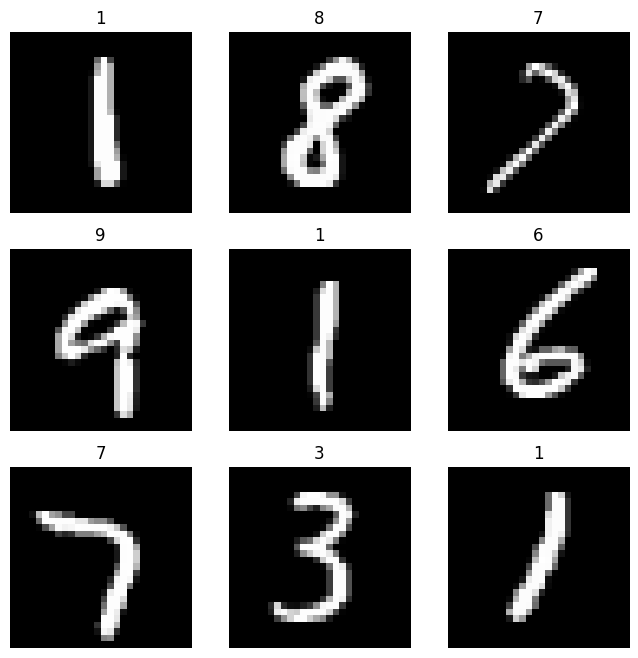

In [1]:
import numpy as np
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor, Lambda
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
    #target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
    #target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

show_data = True
if(show_data):
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(training_data), size=(1,)).item()
        img, label = training_data[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(str(label))
        #plt.title(str(torch.argmax(label).item()))
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()


Now we will define the convolutional neural network. Please check that this network is the same as the example CNN shown in the figure in the text above. Also note that we need to indicate the number of neurons that remain after the max-pooling operation $3136$. Can you calculate this number yourself?

In [2]:
class CNN(nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        self.flatten = nn.Flatten()
        
        in_channel = 1
        out_channel = 16
        self.conv1 = nn.Conv2d(in_channel, out_channel, kernel_size=3, padding ='same') # bias = False
        self.act1 = nn.ReLU(inplace= True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear2 = nn.Linear(3136,512)
        self.act2 = nn.ReLU(inplace= True)
        self.linear3 = nn.Linear(512, 10)

    def forward(self, x):
        
        self.feature_maps = self.conv1(x)
        tmp = self.act1(self.feature_maps)
        tmp = self.maxpool1(tmp)
        tmp = torch.flatten(tmp, 1, -1)
        tmp = self.linear2(tmp)
        tmp = self.act2(tmp)
        logits = self.linear3(tmp)
        
        return logits

model = CNN()

In the following, we train the network. Please remark that we define a training and test loop that makes use of 'data loaders'. These data loaders automatically make the training batches used for a single training step.

In [3]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

# Learning settings: 
learning_rate = 1e-3
batch_size = 64
epochs = 10

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)

Epoch 1
-------------------------------
loss: 2.311892  [    0/60000]
loss: 2.300336  [ 6400/60000]
loss: 2.291142  [12800/60000]
loss: 2.281349  [19200/60000]
loss: 2.278525  [25600/60000]
loss: 2.265490  [32000/60000]
loss: 2.255252  [38400/60000]
loss: 2.246818  [44800/60000]
loss: 2.246653  [51200/60000]
loss: 2.236709  [57600/60000]
Test Error: 
 Accuracy: 63.4%, Avg loss: 2.229777 

Epoch 2
-------------------------------
loss: 2.234189  [    0/60000]
loss: 2.218657  [ 6400/60000]
loss: 2.218752  [12800/60000]
loss: 2.202895  [19200/60000]
loss: 2.183212  [25600/60000]
loss: 2.161034  [32000/60000]
loss: 2.118353  [38400/60000]
loss: 2.107584  [44800/60000]
loss: 2.066716  [51200/60000]
loss: 2.070686  [57600/60000]
Test Error: 
 Accuracy: 67.9%, Avg loss: 2.050379 

Epoch 3
-------------------------------
loss: 2.069366  [    0/60000]
loss: 1.999021  [ 6400/60000]
loss: 1.966496  [12800/60000]
loss: 1.917054  [19200/60000]
loss: 1.880914  [25600/60000]
loss: 1.851873  [32000/600

After training, we can select a random sample (here from the training set) and apply the network to it. Does the network recognize the digit?

Predicted class: 0


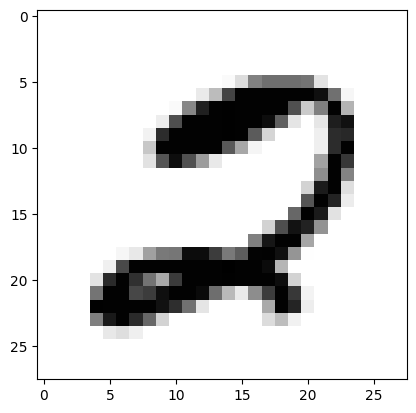

In [15]:
sample_idx = torch.randint(len(training_data), size=(1,)).item()
img, label = training_data[sample_idx]
X = img
X = torch.reshape(X, (1,1,28,28))
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred.item()}")


# show the image
plt.figure()
img = img.detach().numpy()
img = img.reshape((28,28))
plt.imshow(1-img,  cmap='gray')

<OL>
    <LI> Can you make changes to the network and learning procedure to get a better performance? Does it help to create multiple convolutional layers?</LI>
</OL>

# Answers

<FONT COLOR="red"><B>Exercise 1.</B></FONT> <BR>
In this example, tiny learning rates (e.g., $10^{-4}$) will stay close to the initial point. Small learning rates (e.g., $10^-2$) will lead to a nice convergence. Large learning rates like $0.9$ will continuously overshoot the optimum but still converge eventually. A learning rate of $1$ represents a bifurcation point to diverging learning results - itself resulting in ever the same parameters on both sides of the optimum. At larger learning rates, the parameters will diverge.
    
<FONT COLOR="red"><B>Exercise 2.</B></FONT> <BR>
Momentum can improve the number of iterations required to arrive at the optimum when the learning rate is $0.9$. A quick manual optimization shows that $\rho = 0.1$ gives a significant improvement over no momentum ($\rho = 0$). A momentum that is too large (e.g., $\rho = 0.9$) actually worsens the convergence.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

fs = 15

# illustrate gradient descent, adam:
mx = 10
step = 0.01

# artificial loss function and its gradient:
a = 1
b = 0
c = 0
x = np.arange(-mx, mx, step)
loss_function = a * x ** 2 + b * x + c
gradient_loss_function = 2 * a * x + b

# gradient descent:
lr = 0.90
epsilon = 0.0001 # stop when close enough to the minimum
xi = mx / 2 # starting point
n_iterations = 100 # learning steps
xs = []
ys = []
iterations = []

# introduce momentum:
rho = 0.1
grad_momentum = (2 * a * xi + b)

for i in range(n_iterations):
    
    # store the current point and iteration:
    iterations.append(i)
    xs.append(xi)
    
    # perform a learning update:
    grad_momentum = rho * grad_momentum + (1-rho) * (2 * a * xi + b)
    xi = xi - lr * grad_momentum
    
    # store the loss
    ys.append(a * xi ** 2 + b * xi + c)
    
    if(ys[i] < np.min(loss_function) + epsilon):
        print(f'Iteration at convergence: {i}')
        break
        
iterations = np.asarray(iterations)
xs  = np.asarray(xs)
ys = np.asarray(ys)

plt.figure()
plt.plot(x, loss_function, 'k')
plt.scatter(xs, a * xs ** 2 + b * xs + c, c = iterations, cmap='viridis')
plt.xlabel('$x$', fontsize=fs)
plt.ylabel('$\mathcal{L}(x)$', fontsize=fs)
plt.title('Gradient descent, learning rate = ' + str(lr) + ' rho = ' + str(rho), fontsize=fs)
plt.show()

<FONT COLOR="red"><B>Exercise 3.</B></FONT> <BR>
Below, we use the commonly recommended parameter settings for $\rho_1$ and $\rho_2$. With these settings, the Adam algorithm does not necessarily shorten the convergence time, but makes the optimization much more robust against differences in learning rate, preventing divergence. It even works for a learning rate of $3$.

In [ ]:
# illustrate gradient descent, adam:
mx = 10
step = 0.01

# whether to use adam or not:
adam = True

# adam parameters:
rho1 = 0.9
rho2 = 0.999
epsilon = 1e-8
s = 0
r = 0

# loss function:
a = 1
b = 0
c = 0
x = np.arange(-mx, mx, step)
loss_function = a * x ** 2 + b * x + c
gradient_loss_function = 2 * a * x + b

# gradient descent:
lr = 0.02
xi = mx / 2
n_iterations = 100
xs = []
ys = []
iterations = []
for i in range(n_iterations):
    iterations.append(i)
    xs.append(xi)
    if(not adam):
        xi = xi - lr * (2 * a * xi + b)
    else:
        gradient = (2 * a * xi + b)
        s = rho1 * s + (1 - rho1) * gradient
        r = rho2 * r + (1 - rho2) * gradient ** 2
        s_hat = s / (1 - rho1 ** (i + 1))
        r_hat = r / (1 - rho2 ** (i + 1))
        xi = xi - lr * s_hat / (np.sqrt(r_hat) + epsilon)

    ys.append(a * xi ** 2 + b * xi + c)
    if(ys[i] < np.min(loss_function) + epsilon):
        print(f'Iteration at convergence: {i}')
        break
        
iterations = np.asarray(iterations)
xs  = np.asarray(xs)
ys = np.asarray(ys)

plt.figure()
plt.plot(x, loss_function, 'k')
# plt.plot(x, gradient_loss_function, 'r')
# plt.plot(xs, a * xs ** 2 + b * xs + c, 'bo')
plt.scatter(xs, a * xs ** 2 + b * xs + c, c = iterations, cmap='viridis')
plt.xlabel('$x$', fontsize=fs)
plt.ylabel('$\mathcal{L}(x)$', fontsize=fs)
plt.title('Gradient descent, learning rate = ' + str(lr), fontsize=fs)
plt.show()

<FONT COLOR="red"><B>Exercise 4.</B></FONT> <BR>
    
In the code below, we implement a low-pass filter for the validation loss, which stops as soon as the validation loss increases. As you can see, it overfits less to the noise in the training samples. The training loss is <i>higher</i>, but both the validation and test loss are <i>lower</i>.

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import random

# Whether to stop when the validation error increases:
stop_when_val_error_increases = True

# Create Tensors to hold input and outputs.
seed_number = 16012023
torch.manual_seed(seed_number)
np.random.seed(seed_number)
random.seed(seed_number)

limit = 3
n_steps = 1000
x = torch.linspace(-limit, limit, n_steps)
x = torch.reshape(x, (n_steps, 1))
y_no_noise = 0.2 * x
noise = 0.2 * torch.randn(x.shape)
y = y_no_noise + noise

# Split data into training, validation and test sets
n_training = 10
n_val = 30
inds = np.random.choice(n_steps, n_training, replace=False)
inds = np.sort(inds)
x_training = x[inds]
y_training = y[inds]
remaining_inds = np.setdiff1d(np.arange(n_steps), inds)
val_inds = np.random.choice(remaining_inds, n_val, replace=False)
val_inds = np.sort(val_inds)
x_val = x[val_inds]
y_val = y[val_inds]
remaining_inds = np.setdiff1d(remaining_inds, val_inds)
remaining_inds = np.sort(remaining_inds)
x_test = x[remaining_inds]
y_test = y[remaining_inds]
n_test = len(x_test)

# Make a neural network model for the MLP with sigmoid activation functions in the hidden layer, and linear on the output
n_hidden_neurons = 100
model = torch.nn.Sequential(torch.nn.Linear(1, n_hidden_neurons),
                            torch.nn.Sigmoid(),torch.nn.Linear(n_hidden_neurons, 1))

# We will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-2

# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_epochs = 1000
show_plots = False
show_plot_every = int(n_epochs / 5)
training_loss = np.zeros(n_epochs)
validation_loss = np.zeros(n_epochs)
val_low_pass = 0

for t in range(n_epochs):

    # Forward pass
    y_pred = model(x_training)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y_training)
    if t % 100 == 0:
        print(t, loss.item())

    training_loss[t] = loss.item()

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Determine validation loss
    y_val_pred = model(x_val)
    val_loss = loss_fn(y_val_pred, y_val)
    validation_loss[t] = val_loss.item()
    prev_val = val_low_pass
    if(t == 0):
        val_low_pass = val_loss.item()
    else:
        val_low_pass = 0.9 * val_low_pass + 0.1 * val_loss.item()
    if(stop_when_val_error_increases and t > 0 and val_low_pass > prev_val):
        print('Validation loss increased, stopping training')
        break

    if show_plots and t % show_plot_every == 0:
        plt.figure()
        plt.plot(x, y_no_noise, 'k--')
        plt.plot(x_training, y_training, 'ko')
        plt.plot(x_training, y_pred.detach().numpy())
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend(['Ground truth', 'Data', 'Fit'])
        plt.show()

# Plot the final state of affairs:

mode_string = 'Validation set stopping' if stop_when_val_error_increases else 'No validation set'
y_pred = model(x_training)
y_pred_test = model(x_test)
test_loss = loss_fn(y_pred_test, y_test)
loss_string = "{:.2f}".format(test_loss.item())
title_string = mode_string + ', test loss: ' + loss_string
print('Test loss: ', test_loss.item())

plt.figure()
plt.plot(x, y_no_noise, 'k--')
plt.plot(x_training, y_training, 'ro')
plt.plot(x_val, y_val, 'go')
#plt.plot(x_test, y_test, 'x')
plt.plot(x_training, y_pred.detach().numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Ground truth', 'Training data', 'Validation data', 'Fit'])
plt.title(title_string)
plt.show()


# Plot the loss over time:
plt.figure()
plt.plot(training_loss, 'r')
plt.plot(validation_loss, 'g')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

print('Done')

# Plot the final state of affairs to compare SGD and Adam:
plt.figure()
plt.plot(x, y_no_noise, 'k--')
plt.plot(x_training, y_training, 'ko')
plt.plot(x_training, y_pred.detach().numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Ground truth', 'Data', 'Fit'])
plt.show()


y_pred = model(x_training)
loss = loss_fn(y_pred, y_training)
print(f'Average loss on the training set: {loss.item()/n_training:.2f}')

y_pred = model(x_val)
loss = loss_fn(y_pred, y_val)
print(f'Average loss on the validation set: {loss.item()/n_val:.2f}')

y_pred = model(x_test)
loss = loss_fn(y_pred, y_test)
print(f'Average loss on the test set: {loss.item()/n_test:.2f}')


<FONT COLOR="red"><B>Exercise 5.</B></FONT>

<OL>
    <LI>An ensemble of 10 starts to give good results. Of course, for a definite answer, one should define an objective quantitive limit, like a value of the loss function.
    </LI>
</OL>

<FONT COLOR="red"><B>Exercise 6.</B></FONT>

<OL>
    <LI>Not as far as I know... For classification, one can interpret the magnitudes of the outputs as an uncertainty measure. For instance, if the highest activation of an output neuron is $0.3$ and the second highest is $0.2$, the classification is likely less certain than when the outputs are $1.0$ and $0.0$. However, for regression such a scheme cannot be used.</LI>
    <LI>Dropout leads to more variance in the estimates outside of the training domain. The variance can be used as a measure of uncertainty. However, the magnitude of this variance is not strictly correlated with the magnitude of the error in that area.</LI>
</OL>

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np

drop_out = True

# Create Tensors to hold input and target outputs.
limit = 3
n_steps = 1000
x = torch.linspace(-limit, limit, n_steps)
x = torch.reshape(x, (n_steps, 1))

def GT_func(x, a=1, b= 0, c=0):
    return a*x**2 + b*x + c
a = 1
b = 0
c = 0
y = GT_func(x, a, b, c)

# Make a neural network model for the MLP with sigmoid activation functions in the hidden layer, and linear on the output
n_hidden_neurons = 30
p_drop_out = 0.2

# Employ dropout or not:
if(drop_out):
    model = torch.nn.Sequential(torch.nn.Linear(1, n_hidden_neurons),
                                torch.nn.Sigmoid(),torch.nn.Dropout(p=p_drop_out),
                                torch.nn.Linear(n_hidden_neurons, 1))
else:
    model = torch.nn.Sequential(torch.nn.Linear(1, n_hidden_neurons),
                                torch.nn.Sigmoid(), torch.nn.Linear(n_hidden_neurons, 1))

# Learning parameters:

# We will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-5
n_epochs = 10000

show_intermediate_plots = False

# Train:
n_epochs_print = 1000
im = 0
for t in range(n_epochs):

    # Forward pass
    x_in = x
    y_pred = model(x_in)
    y_target = y

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y_target)
    if t % n_epochs_print == 0:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

    if t % n_epochs_print == 0 and show_intermediate_plots:
        h = plt.figure()
        plt.plot(x, y, 'k--')
        plt.plot(x_in, y_pred.detach().numpy())
        text = f'Epoch {t:4d}'
        plt.text(0, 0.8*np.max(np.asarray(y)), text)
        plt.show()

# test the network also outside of the input domain in the training set:
limit_factor = 2
x_test = torch.linspace(-limit_factor*limit, limit_factor*limit, n_steps)
x_test = torch.reshape(x_test, (n_steps, 1))

if(drop_out):
    n_samples = 30
    y_test = torch.zeros((n_steps, n_samples))
    for i in range(n_samples):
        yy = model(x_test)
        y_test[:,i] = yy.squeeze()
    y_test_mean = torch.mean(y_test, dim=1)
else:
    y_test_mean = model(x_test)
    
y_test_GT = GT_func(x_test, a, b, c)

h = plt.figure()
if(drop_out):
    for i in range(n_samples):
        plt.plot(x_test, y_test[:,i].detach().numpy(), 'bo', alpha=0.1)
plt.plot(x_test, y_test_mean.detach().numpy(), 'r')
plt.plot(x_test, y_test_GT, 'k--')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<FONT COLOR="red"><B>Exercise 7.</B></FONT> <BR>
This is a quite open exercise. Higher performance can easily be obtained with, e.g., more training epochs. This does cost more time. 
    
Below we show how you can add a convolutional layer. This requires recalculating the number of neurons after flattening. Whereas the initial image is $28 \times 28 \times 1$ pixels, after one convolution and max-pool, the resulting tensor has size $14 \times 14 \times 16$, and after our second convolution and max-pool $7 \times 7 \times 16 = 784$ neurons. Please remark that this is due to our settings, namely ``padding = 'same'`` and ``stride=2``. 
    
Adding this convolutional layer actually <i>lowers</i> the performance after 10 epochs, but it may augment performance for longer learning runs.

In [ ]:
class CNN(nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        self.flatten = nn.Flatten()
        
        in_channel = 1
        out_channel = 16
        self.conv1 = nn.Conv2d(in_channel, out_channel, kernel_size=3, padding ='same') # bias = False
        self.act1 = nn.ReLU(inplace= True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Extra convolutional layer:
        self.conv2 = nn.Conv2d(out_channel, out_channel, kernel_size=3, padding ='same') # bias = False
        self.act2 = nn.ReLU(inplace= True)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # We had to recalculate the number of neurons after flattening (784):
        self.linear2 = nn.Linear(784,392)
        self.act2 = nn.ReLU(inplace= True)
        self.linear3 = nn.Linear(392, 10)

    def forward(self, x):
        
        self.feature_maps = self.conv1(x)
        tmp = self.act1(self.feature_maps)
        tmp = self.maxpool1(tmp)
        
        # Extra convolutional layer:
        tmp = self.conv2(tmp)
        tmp = self.act2(tmp)
        tmp = self.maxpool2(tmp)
        
        tmp = torch.flatten(tmp, 1, -1)
        tmp = self.linear2(tmp)
        tmp = self.act2(tmp)
        logits = self.linear3(tmp)
        
        return logits

model = CNN()